<a href="https://colab.research.google.com/github/digs1998/COVID-19-analysis-through-Chest-X-rays/blob/master/COVID_19_from_Chest_Xrays_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#https://www.dropbox.com/s/zokl4xychpt8fkm/Datasetfolder.zip?dl=0

!wget https://www.dropbox.com/s/ff654m6o67cukbm/CovidDataset-20200427T133042Z-001.zip?dl=0


--2020-07-28 10:40:39--  https://www.dropbox.com/s/ff654m6o67cukbm/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ff654m6o67cukbm/CovidDataset-20200427T133042Z-001.zip [following]
--2020-07-28 10:40:39--  https://www.dropbox.com/s/raw/ff654m6o67cukbm/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc400a83274aa1acde80c69784c4.dl.dropboxusercontent.com/cd/0/inline/A8ZD4Vrl0ivVj26KpEQ35a-1319TX6dfWoE6_e-ovE5eFYpNmTwogKiv2B6lDZbDWsSPvV1qsULqs90b1jpv6lJXMWaNognQ-tbfkN2TskAY4Xk58cgA3LIBz6kZQcDkpFU/file# [following]
--2020-07-28 10:40:39--  https://uc400a83274aa1acde80c69784c4.dl.dropboxusercontent.com/cd/0/inline/A8ZD4Vrl0ivVj26KpEQ35a-1319TX6dfWo

In [58]:
!unzip /content/CovidDataset-20200427T133042Z-001.zip?dl=0

Archive:  /content/CovidDataset-20200427T133042Z-001.zip?dl=0
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
replace CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
replace CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
replace CovidDataset/Val/Covid/4-x-day1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
replace CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
replace CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg? [y]es, [n]o, [

In [59]:
train_path = '/content/CovidDataset/Train'
val_path = '/content/CovidDataset/Val'


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image

In [61]:
#CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [63]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = image.ImageDataGenerator(
    rescale=1./255
)

In [64]:
train_generator = train_datagen.flow_from_directory(
        'CovidDataset/Train',
        target_size=(224,224),
        batch_size=32,
        class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [65]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [66]:
validation_generator = test_datagen.flow_from_directory(
        'CovidDataset/Val',
        target_size=(224,224),
        batch_size=32,
        class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [67]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [68]:
hist = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs=8,
    validation_data = validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/8
7/7 [==============================] - 10s 1s/step - loss: 3.8744 - accuracy: 0.5312 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 2/8
7/7 [==============================] - 9s 1s/step - loss: 0.6819 - accuracy: 0.5714 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 3/8
7/7 [==============================] - 9s 1s/step - loss: 0.6137 - accuracy: 0.7054 - val_loss: 0.6206 - val_accuracy: 0.7500
Epoch 4/8
7/7 [==============================] - 10s 1s/step - loss: 0.4982 - accuracy: 0.7455 - val_loss: 0.4507 - val_accuracy: 0.9167
Epoch 5/8
7/7 [==============================] - 9s 1s/step - loss: 0.3175 - accuracy: 0.8795 - val_loss: 0.2999 - val_accuracy: 0.9500
Epoch 6/8
7/7 [==============================] - 9s 1s/step - loss: 0.2956 - accuracy: 0.8705 - val_loss: 0.3355 - val_accuracy: 0.9667
Epoch 7/8
7/7 [==============================] - 9s 1s/step - loss: 0.1771 - accuracy: 0.9196 - val_loss: 0.1141 - val_accuracy: 0.9667
Epoch 8/8
7/7 [==============================]

Text(0.5, 1.0, 'Metrics estimations')

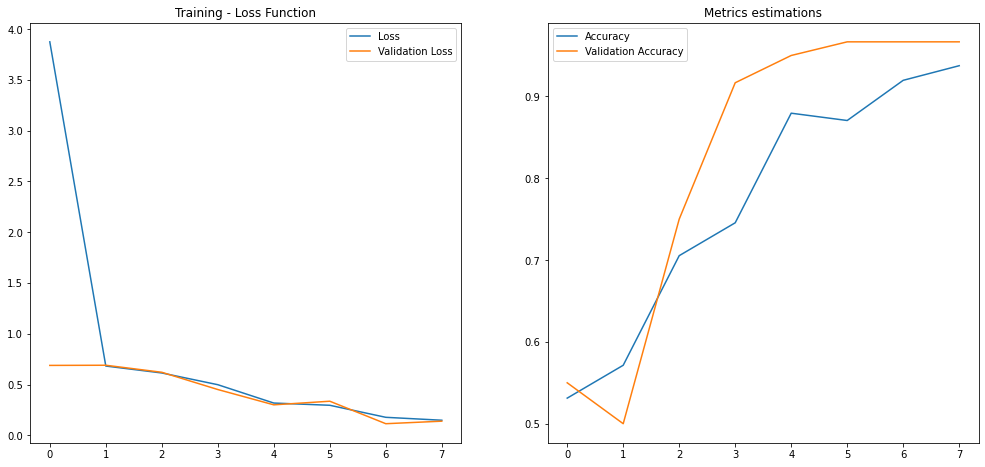

In [69]:
plt.figure(figsize=(17,17))
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

plt.legend()
plt.title('Metrics estimations')

In [70]:
model.save('cnn_xray.h5')

In [71]:
#predictions
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

In [80]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [72]:
labels

{'Covid': 0, 'Normal': 1}

In [73]:
print('CNN Model Predictions : \n{}'.format(predictions))

CNN Model Predictions : 
['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid']


In [74]:
label=validation_generator.classes


In [75]:
from sklearn.metrics import confusion_matrix, classification_report

cf_matrix = confusion_matrix(predicted_class_indices,label)
cf_matrix

array([[30, 30],
       [ 0,  0]])

In [76]:
cfl = classification_report(predicted_class_indices,label)
print(cfl)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        60
           1       0.00      0.00      0.00         0

    accuracy                           0.50        60
   macro avg       0.50      0.25      0.33        60
weighted avg       1.00      0.50      0.67        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


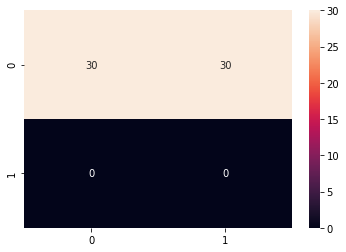

In [77]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)